In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import nltk
from nltk.corpus import stopwords
# from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
from textblob import Word

In [2]:
test = pd.read_csv('Example_Technical_Skills.csv')
test = test.dropna()
test

,Technology Skills
0,SAP Fiori Developer
1,Oracle Instance Management & Strategy
2,Boomi Master Data Management
3,Digital Manufacturing on Cloud ( DMC)
4,DevOps
...,...
974,Oracle Cloud Revenue Management
975,Oracle EBS Grid Contral Mgt Pack
976,Amazon Elastic MapReduce (EMR)
977,Apache Kudu


In [3]:
test.rename(columns = {'Technology Skills':'Technology_Skills'}, inplace = True)

In [4]:
test

,Technology_Skills
0,SAP Fiori Developer
1,Oracle Instance Management & Strategy
2,Boomi Master Data Management
3,Digital Manufacturing on Cloud ( DMC)
4,DevOps
...,...
974,Oracle Cloud Revenue Management
975,Oracle EBS Grid Contral Mgt Pack
976,Amazon Elastic MapReduce (EMR)
977,Apache Kudu


In [5]:
## Lower case
test['Technology_Skills'] = test['Technology_Skills'].apply(lambda x: " ".join(x.lower()for x in x.split()))
## remove tabulation and punctuation
test['Technology_Skills'] = test['Technology_Skills'].str.replace('[^\w\s]','')

## digits
# test['Technology Skills'] = test['Technology Skills'].str.replace('\d+', '')

#remove stop words
# stop = stopwords.words('english')
# test['Technology Skills'] = test['Technology Skills'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
# test['Technology Skills'] = test['Technology Skills'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("Preprocessed data: \n")
print(test.head())

Preprocessed data: 

                      Technology_Skills
0                   sap fiori developer
1  oracle instance management  strategy
2          boomi master data management
3   digital manufacturing on cloud  dmc
4                                devops


In [6]:
s=''
for i in test.Technology_Skills:
    s=s+i+' '

In [7]:
dic=list(s.split(' '))
dic

['sap',
 'fiori',
 'developer',
 'oracle',
 'instance',
 'management',
 '',
 'strategy',
 'boomi',
 'master',
 'data',
 'management',
 'digital',
 'manufacturing',
 'on',
 'cloud',
 '',
 'dmc',
 'devops',
 'ca',
 'sam',
 'openshift',
 'acxiom',
 'data',
 'analytics',
 'sap',
 'digital',
 'boardroom',
 'seeburger',
 'bis',
 'sap',
 'transport',
 'management',
 'peoplesoft',
 'workflow',
 'nice',
 'actimize',
 'oracle',
 '',
 'access',
 'manager',
 'sap',
 'electronic',
 'data',
 'interchange',
 'edi',
 'ideas',
 'crowdsourcing',
 'peoplesoft',
 'workforce',
 'planning',
 'sap',
 'benefits',
 'onesource',
 'rd',
 'credit',
 'manager',
 'sap',
 'consignment',
 'ms',
 'bot',
 'framework',
 'ibm',
 'websphere',
 'application',
 'server',
 'microsoft',
 '',
 'azure',
 'ad',
 'domain',
 'services',
 'sap',
 'ibp',
 '',
 'bpc',
 'oracle',
 'hyperion',
 'capital',
 'asset',
 'planning',
 'sap',
 'introscope',
 'wily',
 'ejb',
 '',
 'rmi',
 'sas',
 'base',
 'siebel',
 'modules',
 'non',
 'functi

In [8]:
len(dic)

3163

In [9]:
from collections import Counter
dic=Counter(dic)
len(dic)

1306

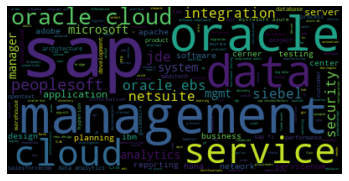

In [10]:
## Visualize data
# jobs_list = jda.job_title.unique().tolist()
# for job in jobs_list:
text = s
wordcloud = WordCloud().generate(text)
# print("\n***",job,"***\n")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
# s1=''
# for i in test.Technology_Skills:
#     s1=s1+i+','
# s1

In [12]:
# dic=list(s1.split(','))
# dic

In [13]:
df = pd.read_csv('Raw_Skills_Dataset.csv')
df = df.dropna()
df.drop(df[df['RAW DATA']=='-'].index, inplace=True)
df

,RAW DATA
0,What ifs
1,seniority
2,familiarity
3,functionalities
4,Lambdas
...,...
34111,negotiation
34112,deadlines
34113,"Self-motivated, enthusiastic and strong drive"
34114,negotiation


In [14]:
bag=[]
bag2=[]
for i in df['RAW DATA']:
    q=0
    for k in i.split(' '):
        for j in dic:
            if(k==j):
                bag.append(i)
                q=1
                break
        if(q==1):
            break
    if(q==0):
        bag2.append(i)
bag

['Object Oriented analysis',
 'code versioning tools',
 'continuous integration',
 'continuous delivery development processes',
 'frameworks',
 'analytical reporting',
 'conceptual data models',
 'standard naming conventions',
 'high throughput data access services',
 'analyze/profile data',
 'conceptual, logical & physical data model designs',
 'reporting and analytics solutions',
 'physical databases',
 'integrations',
 'Demonstrable experience',
 'logical and physical data models',
 'modern enterprise data architectures',
 'data toolsets',
 'e.g.: data warehouse',
 'data marts',
 'modeling tools',
 'profiling tools',
 'Scala programming experience',
 'each following distributed technologies',
 'standard methodologies',
 'similar cloud platform technologies',
 'experience building cloud environments',
 'Excellent Unix/Linux experience and programming experience',
 'microservice architecture',
 'orchestration',
 'kubernetes',
 'cloud environments',
 'service meshes',
 'vault',
 'API g

In [15]:
ow=['other','a','the','e.g.:','e.g.',',']
# ow1['other ','a ','the ','e.g. ']
for i in range(0,len(bag)):
    q=0
    for k in ow:
        if(bag[i].split()[0]==k):
            bag[i]=bag[i].replace(k+' ', '')
            break
bag    

['Object Oriented analysis',
 'code versioning tools',
 'continuous integration',
 'continuous delivery development processes',
 'frameworks',
 'analytical reporting',
 'conceptual data models',
 'standard naming conventions',
 'high throughput data access services',
 'analyze/profile data',
 'conceptual, logical & physical data model designs',
 'reporting and analytics solutions',
 'physical databases',
 'integrations',
 'Demonstrable experience',
 'logical and physical data models',
 'modern enterprise data architectures',
 'data toolsets',
 'data warehouse',
 'data marts',
 'modeling tools',
 'profiling tools',
 'Scala programming experience',
 'each following distributed technologies',
 'standard methodologies',
 'similar cloud platform technologies',
 'experience building cloud environments',
 'Excellent Unix/Linux experience and programming experience',
 'microservice architecture',
 'orchestration',
 'kubernetes',
 'cloud environments',
 'service meshes',
 'vault',
 'API gateway

In [16]:
for i in range(0,len(bag)):
    bag[i]=bag[i].strip()
bag

['Object Oriented analysis',
 'code versioning tools',
 'continuous integration',
 'continuous delivery development processes',
 'frameworks',
 'analytical reporting',
 'conceptual data models',
 'standard naming conventions',
 'high throughput data access services',
 'analyze/profile data',
 'conceptual, logical & physical data model designs',
 'reporting and analytics solutions',
 'physical databases',
 'integrations',
 'Demonstrable experience',
 'logical and physical data models',
 'modern enterprise data architectures',
 'data toolsets',
 'data warehouse',
 'data marts',
 'modeling tools',
 'profiling tools',
 'Scala programming experience',
 'each following distributed technologies',
 'standard methodologies',
 'similar cloud platform technologies',
 'experience building cloud environments',
 'Excellent Unix/Linux experience and programming experience',
 'microservice architecture',
 'orchestration',
 'kubernetes',
 'cloud environments',
 'service meshes',
 'vault',
 'API gateway

In [17]:
for i in range(0,len(bag)):
    if(bag[i][0]==','):
        print(bag[i])

In [18]:
len(bag)

12805

In [19]:
len(bag2)

21199

In [ ]:
# dic2=[]
# for i in range(0,len(bag2)):
#     dic2.append[b]

In [21]:
import re
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

In [22]:
corpus = []
for i in range(0, len(bag)):
    review = re.sub('[^a-zA-Z]', ' ', bag[i])
    review = review.lower()
    review = review.split()
#     ps = PorterStemmer()
#     review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
print(len(corpus))

12805


In [24]:
for i in range(0, len(bag2)):
    review = re.sub('[^a-zA-Z]', ' ', bag2[i])
    review = review.lower()
    review = review.split()
#     ps = PorterStemmer()
#     review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [25]:
print(len(corpus))

34004


In [26]:
corpus

['object oriented analysis',
 'code versioning tools',
 'continuous integration',
 'continuous delivery development processes',
 'frameworks',
 'analytical reporting',
 'conceptual data models',
 'standard naming conventions',
 'high throughput data access services',
 'analyze profile data',
 'conceptual logical physical data model designs',
 'reporting and analytics solutions',
 'physical databases',
 'integrations',
 'demonstrable experience',
 'logical and physical data models',
 'modern enterprise data architectures',
 'data toolsets',
 'data warehouse',
 'data marts',
 'modeling tools',
 'profiling tools',
 'scala programming experience',
 'each following distributed technologies',
 'standard methodologies',
 'similar cloud platform technologies',
 'experience building cloud environments',
 'excellent unix linux experience and programming experience',
 'microservice architecture',
 'orchestration',
 'kubernetes',
 'cloud environments',
 'service meshes',
 'vault',
 'api gateways',

In [29]:
a=[]
for i in range(0,len(bag)):
    a.append(1)
for i in range(21199):
    a.append(0)

In [30]:
submission = pd.DataFrame({
        "Technical_skills": corpus,   # I have given prediction of random forest just change it to save prediction of other models here
        "tech_or_not": a
    })
submission.to_csv('sub4.csv', index=False)
submission = pd.read_csv('sub4.csv')
submission.head(20)

,Technical_skills,tech_or_not
0,object oriented analysis,1
1,code versioning tools,1
2,continuous integration,1
3,continuous delivery development processes,1
4,frameworks,1
5,analytical reporting,1
6,conceptual data models,1
7,standard naming conventions,1
8,high throughput data access services,1
9,analyze profile data,1


In [31]:
submission

,Technical_skills,tech_or_not
0,object oriented analysis,1
1,code versioning tools,1
2,continuous integration,1
3,continuous delivery development processes,1
4,frameworks,1
...,...,...
33999,all applicants,0
34000,negotiation,0
34001,deadlines,0
34002,negotiation,0


In [32]:
a=[]
for i in range(0,len(bag)):
    a.append([1])
for i in range(21199):
    a.append([0])

In [33]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 34004)
X = cv.fit_transform(corpus).toarray()
y = a

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
cm

array([[ 970, 3295],
       [ 108, 2428]], dtype=int64)

In [35]:
len(X[0])

6467

In [16]:
df = df.dropna()

In [1]:
# Creating the Bag of Words model
import pandas as pd
df = pd.read_csv('sub4.csv')

In [2]:
import re
corpus = []
# print(df['Technical_skills'][1])
for i in range(0,34004):
# #     print(i)
#     review = re.sub('[^a-zA-Z]', ' ', df['Technical_skills'][i])
#     review = review.lower()
#     review = review.split()
#     review = ' '.join(review)
    corpus.append(df['Technical_skills'][i])

In [3]:
corpus[5300:]

['swift and consistent resolutions',
 'core banking processor',
 'over live customers',
 'lms suite',
 'the five modules',
 'lms suite',
 'web application experience',
 'customer support experience',
 'ticketing system',
 nan,
 'modules',
 'key responsibilites run queries',
 'user functionality',
 'technical implementations issues',
 'software installations',
 'bachelor s degree',
 'software proficiency',
 'must strong problem solving skills',
 'affinity',
 'mutually beneficial partnership',
 'recruiting',
 'api testing and database systems concepts',
 'quality assurance metrics',
 'general debugging',
 'diagnostic analysis',
 'perform troubleshooting and root cause analysis',
 'emerging test automation tools',
 'procurement and development efforts',
 'documentation',
 'functional and non functional requirements',
 'node js testing',
 'data driven frameworks',
 'exploratory testing',
 'user acceptance testing',
 'smoke sanity testing',
 'cross browser testing',
 'aoda testing',
 'excel

In [4]:
y = df.iloc[:, 1].values
y2=[y[x] for x in range(len(corpus)) if pd.isnull(corpus[x])==False and corpus[x]!='nan']

In [5]:
import numpy
c2=[x for x in corpus if pd.isnull(x)==False and x!='nan']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 34004)
X = cv.fit_transform(c2).toarray()
y = y2

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

# Fit model
clf = MultinomialNB()
clf.fit(X_train, y_train)
## Predict
y_predicted = clf.predict(X_test)

train data shape:  (27147, 6467)
test data shape:  (6787, 6467)
[[3809  458]
 [ 335 2185]]


In [14]:
#evaluate the predictions
print("Accuracy score is: ",accuracy_score(y_test, y_predicted))
print("Classes: (to help read Confusion Matrix)\n", clf.classes_)
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_predicted))
print("Classification Report: ")
print(classification_report(y_test, y_predicted))

Accuracy score is:  0.883158980403713
Classes: (to help read Confusion Matrix)
 [0 1]
Confusion Matrix: 
[[3809  458]
 [ 335 2185]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      4267
           1       0.83      0.87      0.85      2520

    accuracy                           0.88      6787
   macro avg       0.87      0.88      0.88      6787
weighted avg       0.88      0.88      0.88      6787

